In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (10,10)
plt.rcParams['figure.dpi']= 500
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Classification Problem

In [3]:
df = pd.read_csv('Iris.csv', index_col=0)

In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [5]:
features = df.iloc[:,:-1]
target = df['Species']

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(features,target, test_size=0.2, random_state=1)

In [7]:
decisiontree = DecisionTreeClassifier(criterion='gini')

In [8]:
decisiontree.fit(xtrain, ytrain)
ypred = decisiontree.predict(xtest) 
ypred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [11]:
confusion_matrix(ytest,ypred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [12]:
decisiontree.score(xtrain, ytrain)

1.0

In [13]:
decisiontree.score(xtest, ytest)

0.9666666666666667

- Overfitting: Large gap between training accuracy and testing accuracy. (100% - 90%)
- Underfitting: Low values for both training and testing accuracy.
- Generalization: High and close values for both training and testing accuracy. Maximum 3% difference between training accuracy and testing accuracy(100% - 97%)

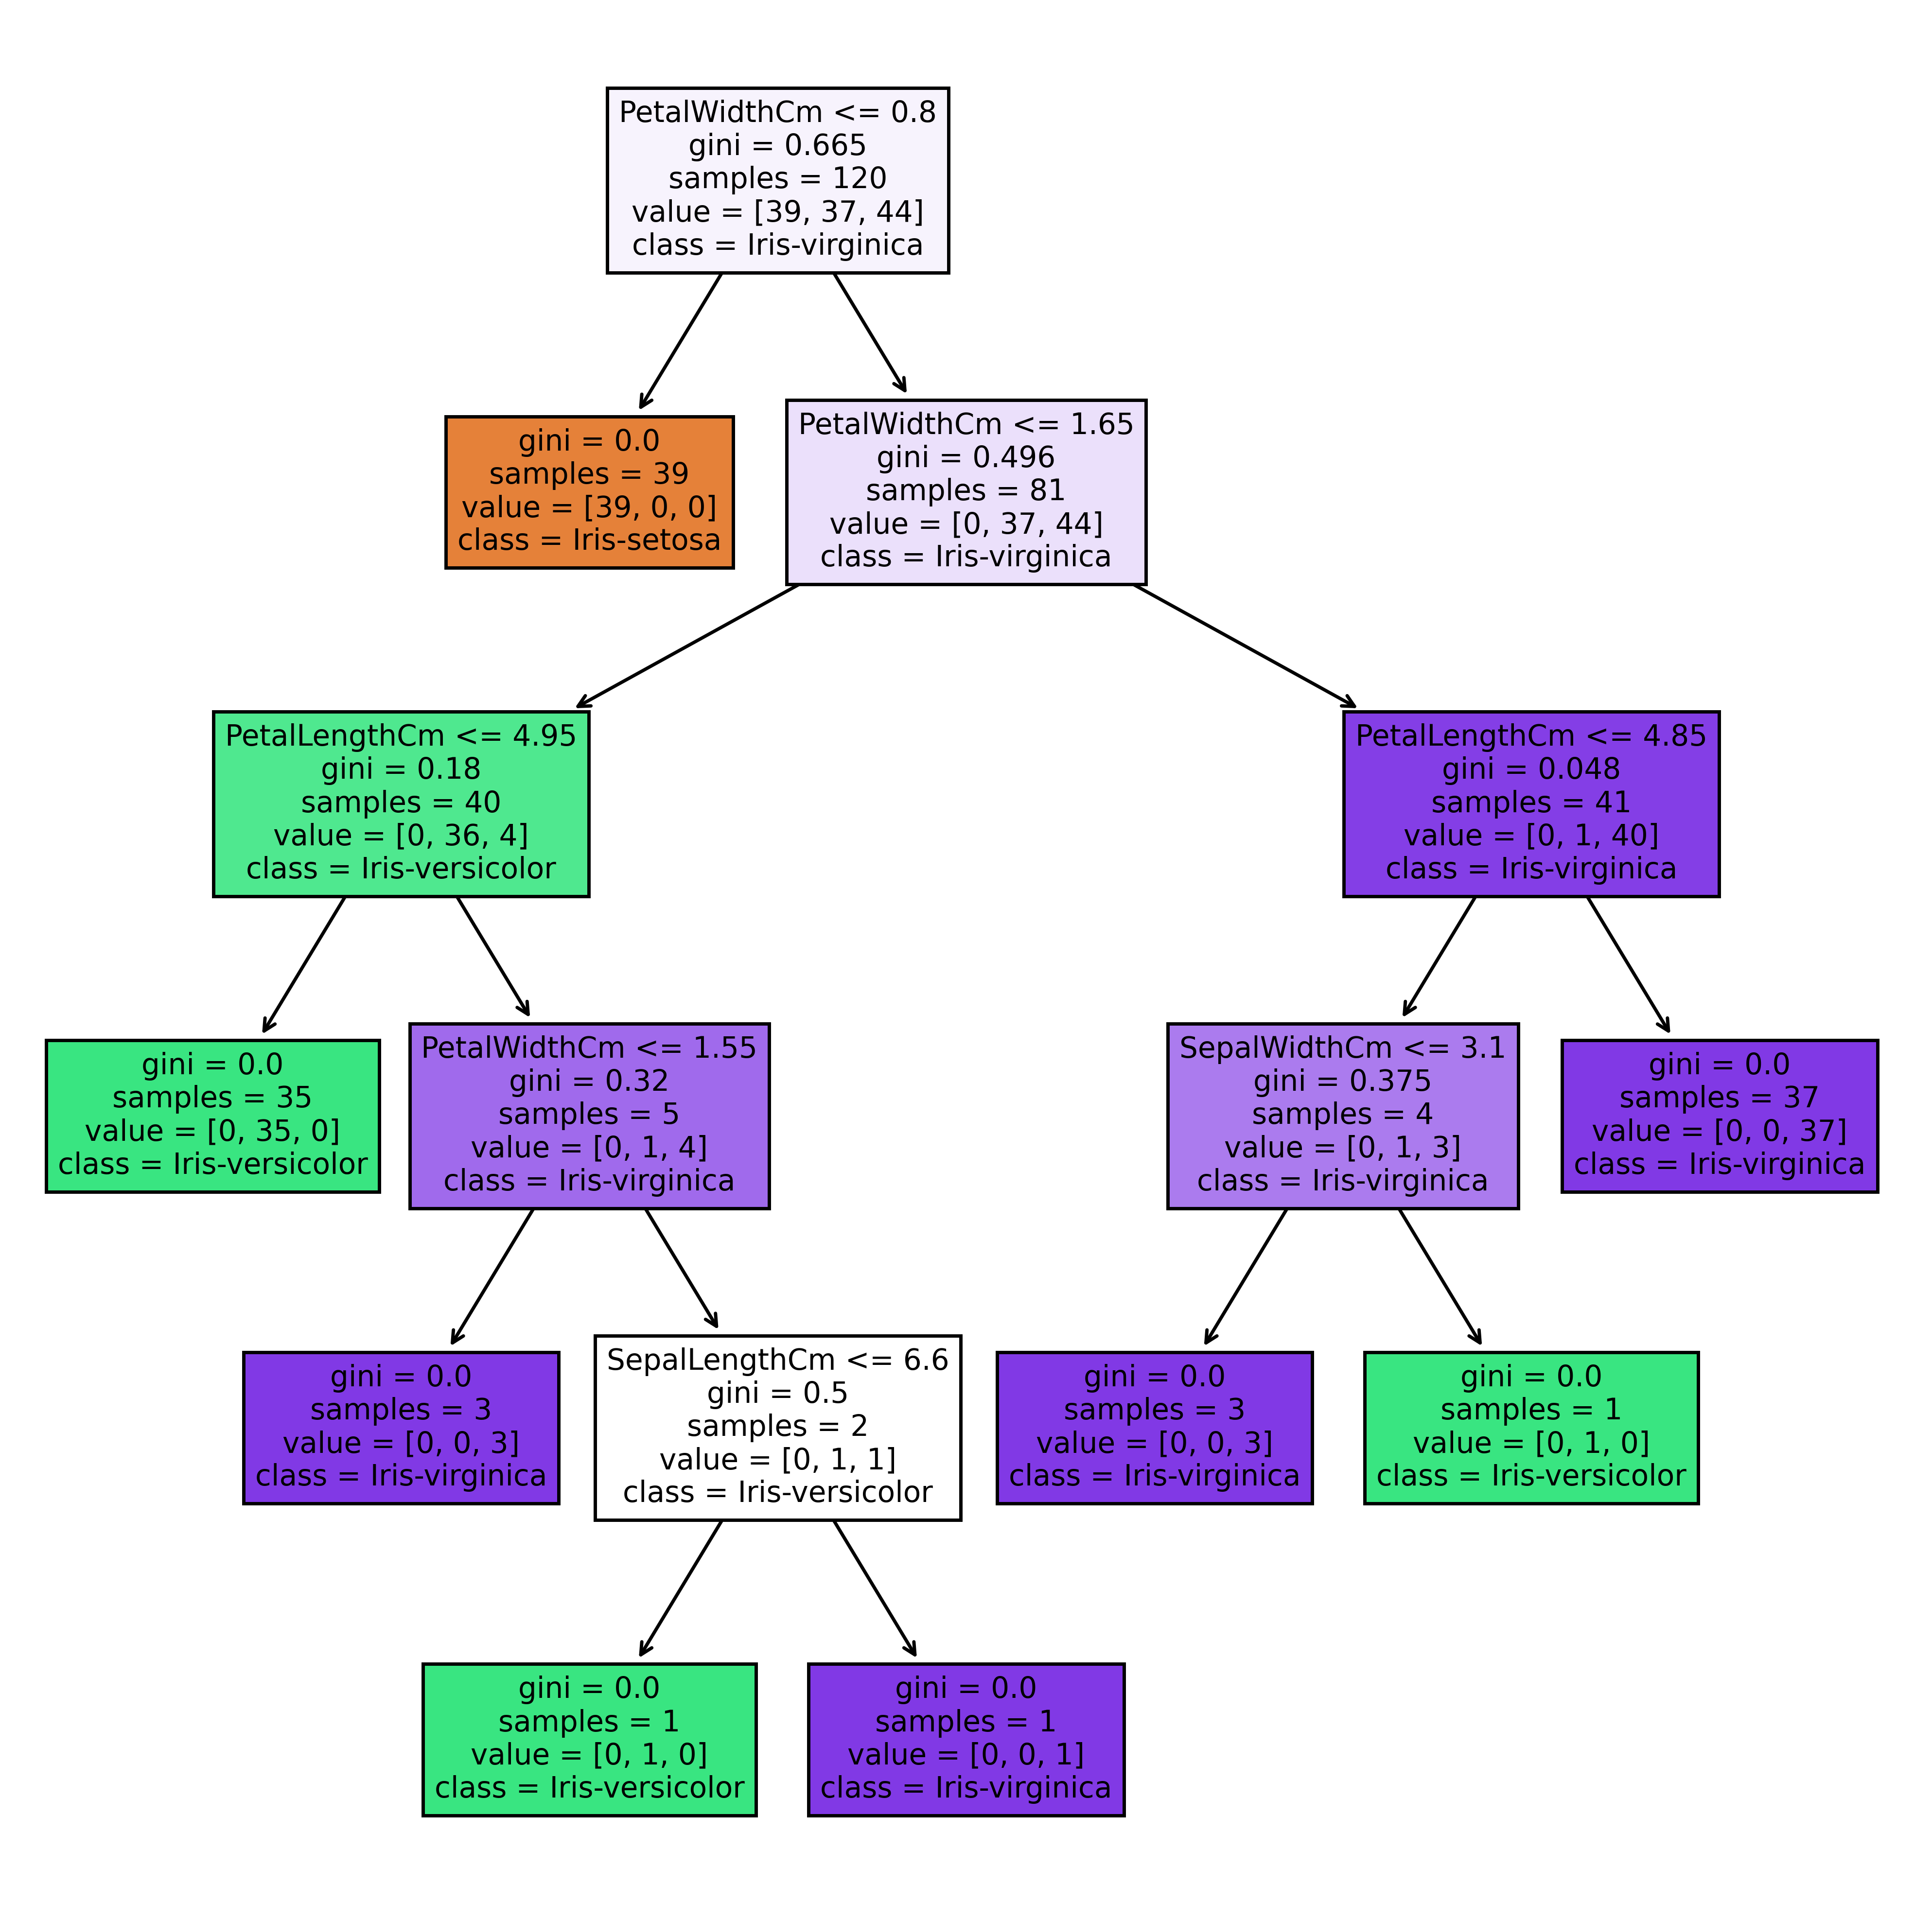

In [14]:
tree.plot_tree(decisiontree, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
               class_names= ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
              filled=True)
plt.show()

In [15]:
# CART for Regression Problem

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
x = df.iloc[:,: 3]
y = df['PetalWidthCm']

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)
yp

array([1.4, 0.4, 1.4, 1.5, 1.5, 0.2, 1. , 1.5, 1.5, 1.2, 1.8, 0.2, 0.2,
       0.1, 0.4, 1.5, 1.8, 1.4, 1.5, 1.8, 0.5, 1.8, 0.2, 1.8, 2.2, 2.1,
       1.4, 2.3, 0.2, 0.2, 0.3, 0.2, 1.4, 0.2, 0.2, 1.5, 1.5, 0.2, 0.3,
       0.2, 1.9, 1.5, 1.4, 0.2, 0.2])

In [21]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(0.998523988291134, 0.8980731639206925)

In [22]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')

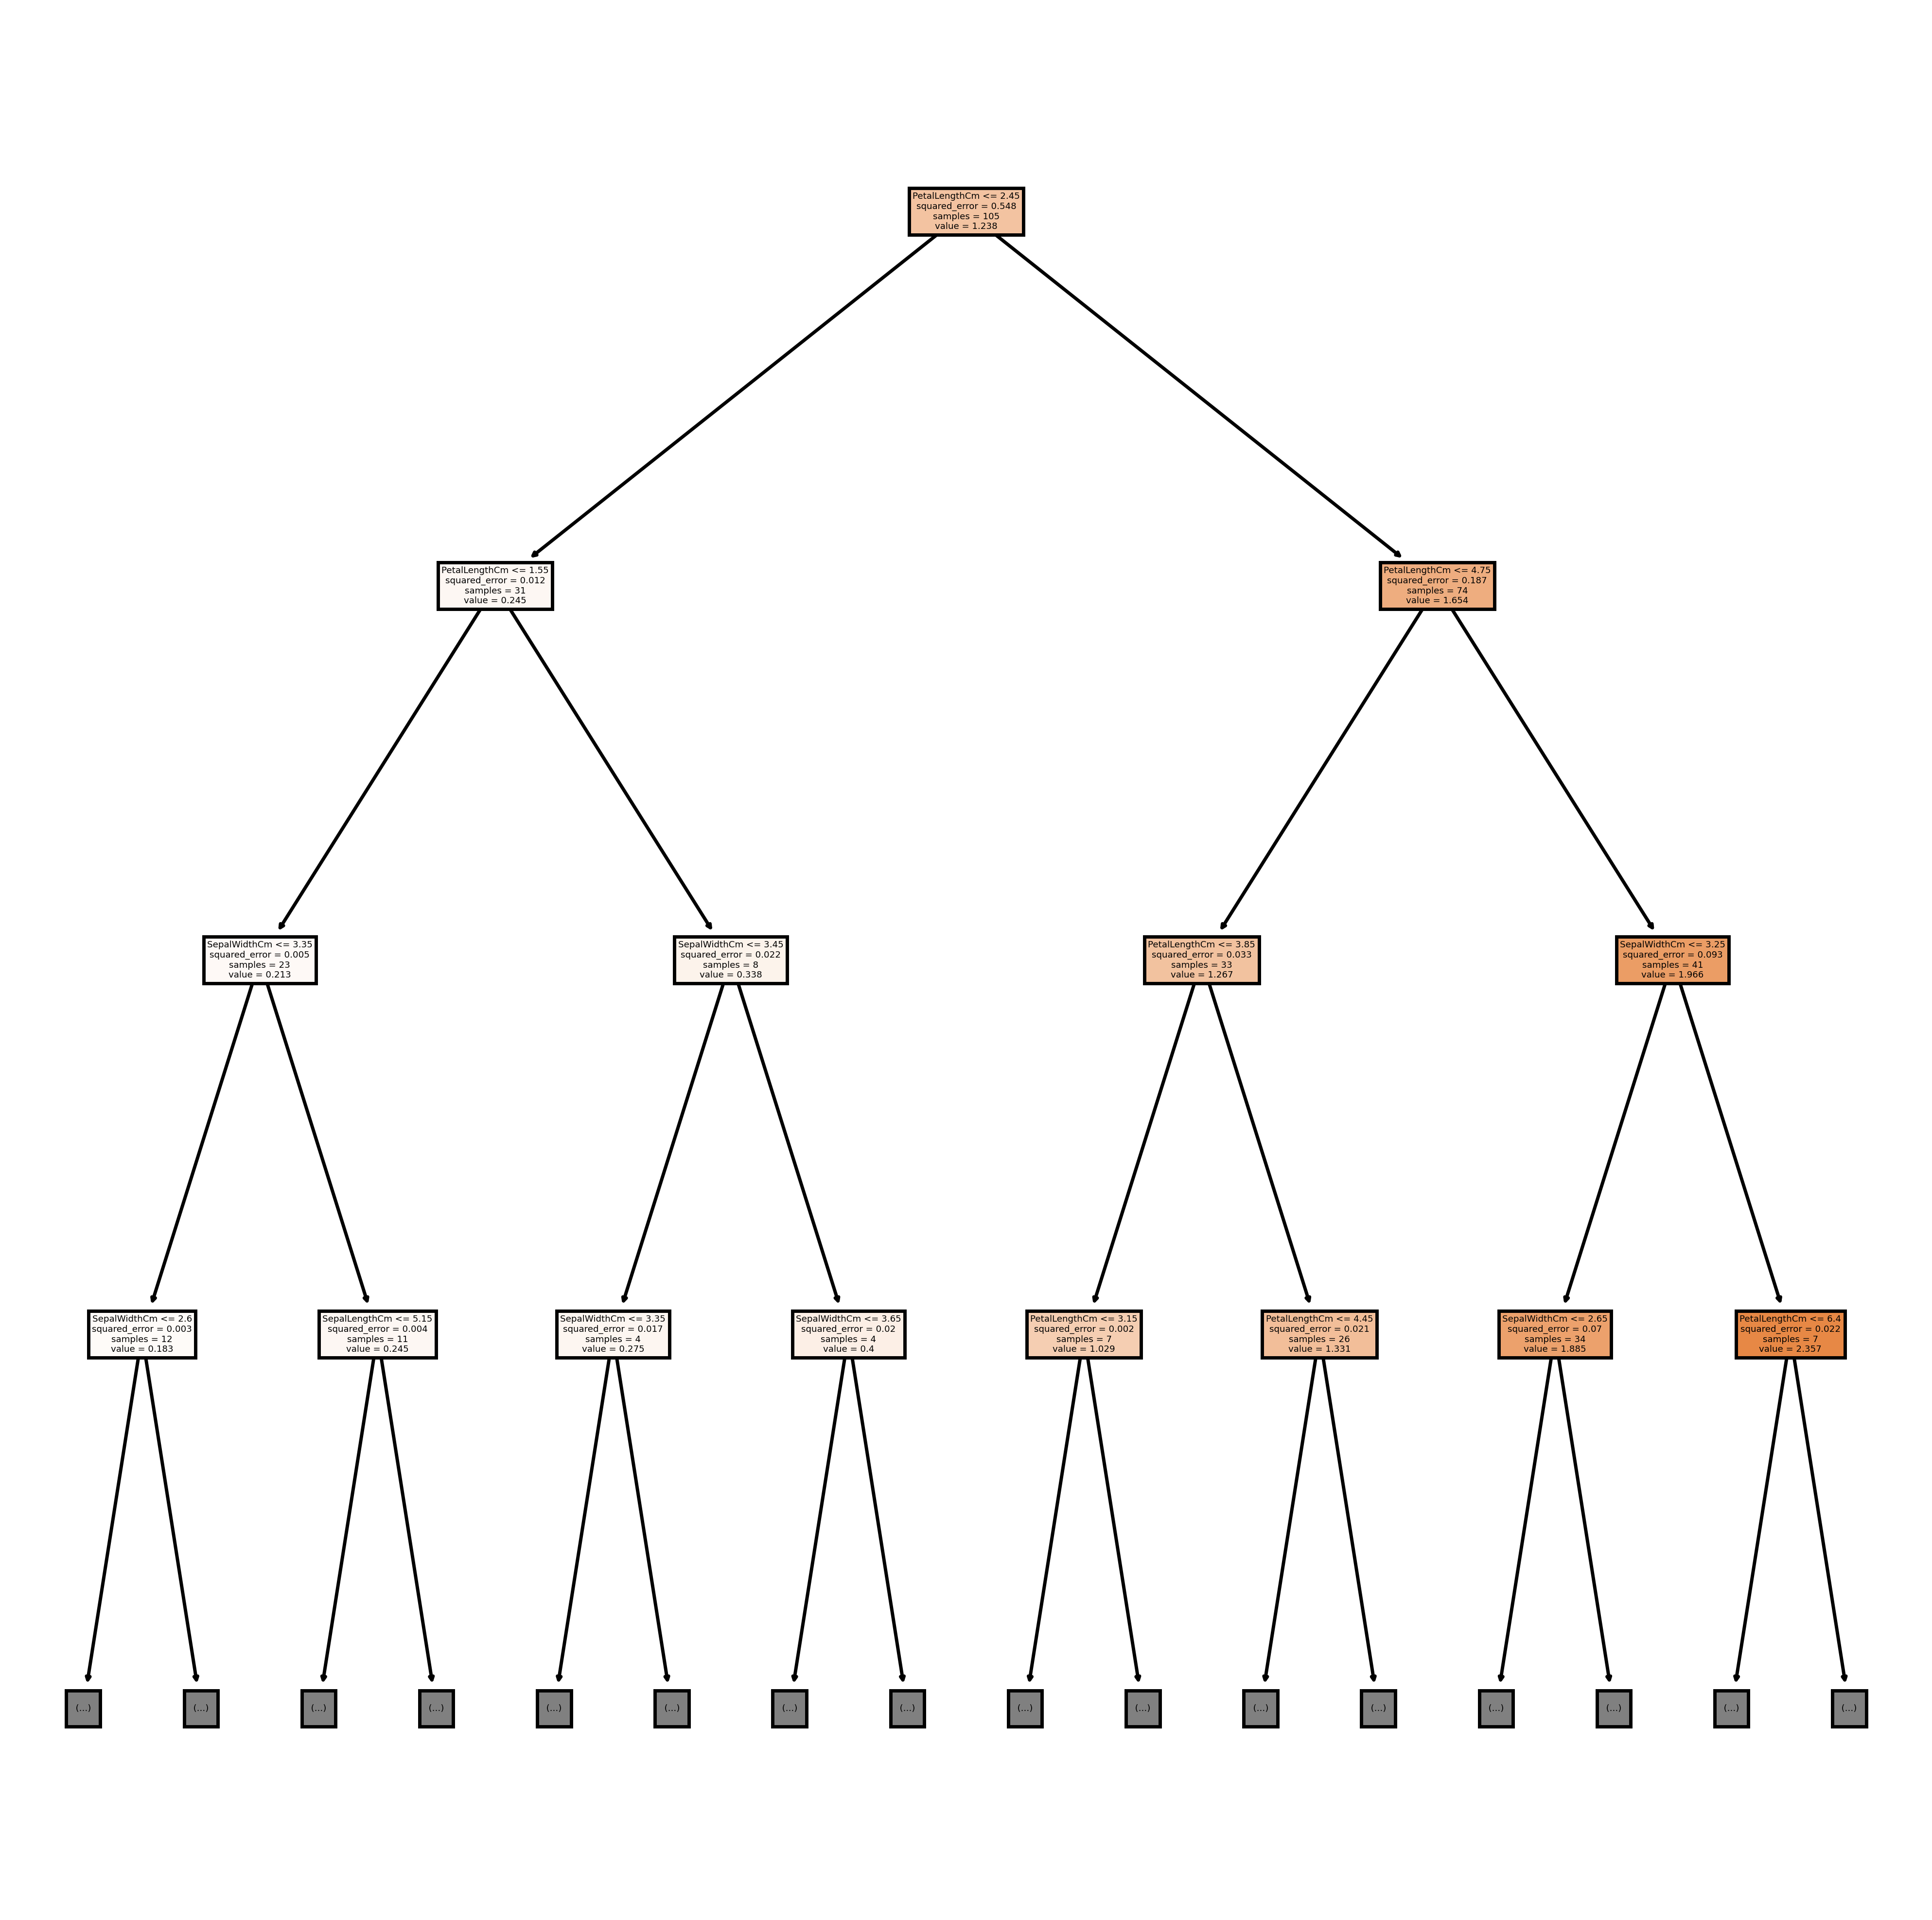

In [23]:
tree.plot_tree(dtr, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'],max_depth=3, filled=True)
plt.show()

In [24]:
#Hyperparameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [27]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [28]:
# estimator is which algorithm you want to use Supervised Algo
# param_grid take the param dict and do the test
# 
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, verbose=1)

In [29]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [30]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'splitter': 'best'}

In [31]:
dtr = DecisionTreeRegressor(criterion='squared_error',
                           max_depth=3,splitter='best')

In [32]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [33]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.9419858001628175, 0.9327669485234616)

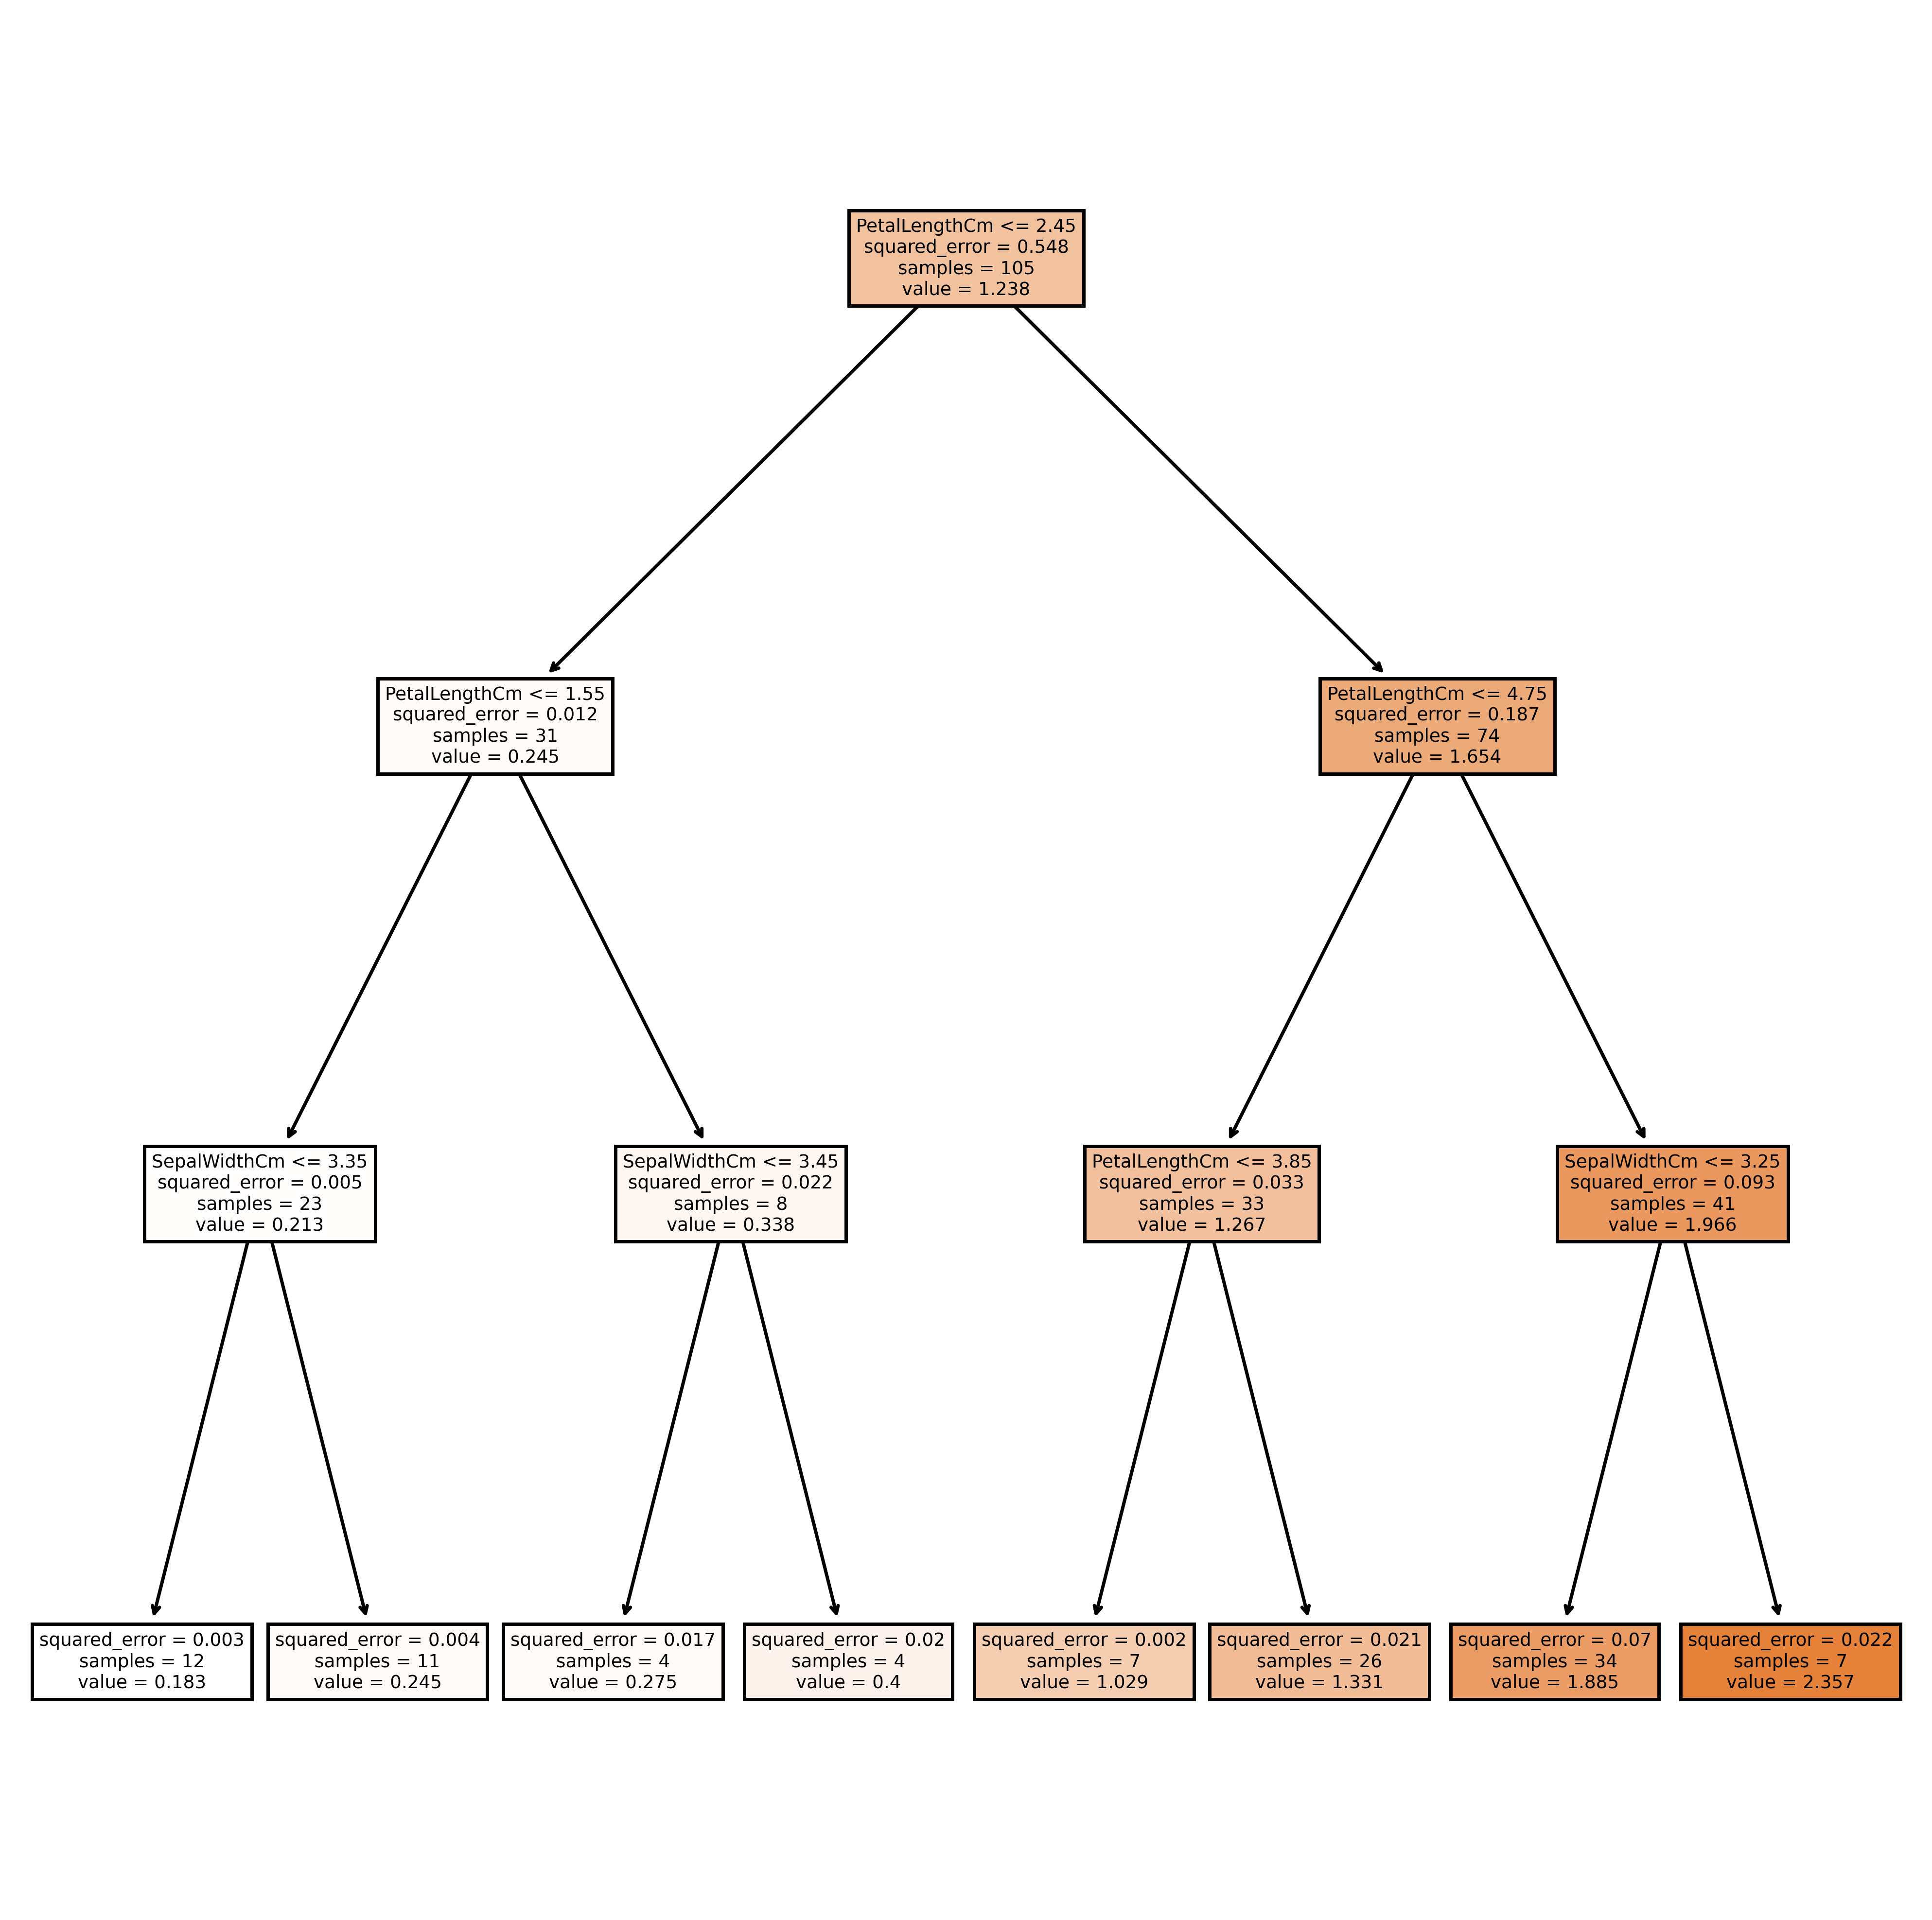

In [34]:
tree.plot_tree(dtr, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'],filled=True)
plt.show()